In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
os.chdir('..')

Cookies Sucessifuly Loaded
----------------------------------------------------
HTML for ANSS captured successifuly


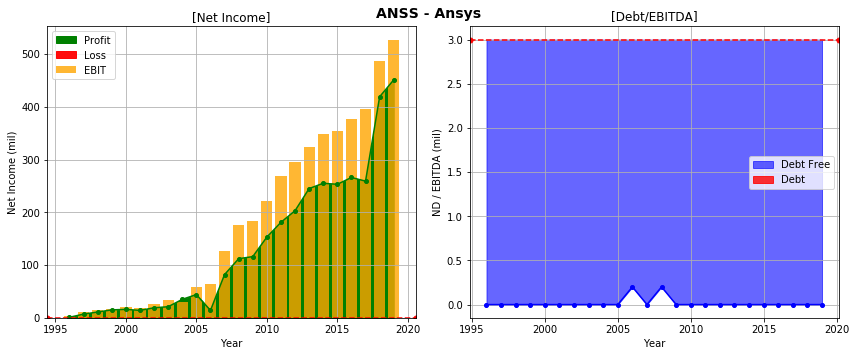

No payout


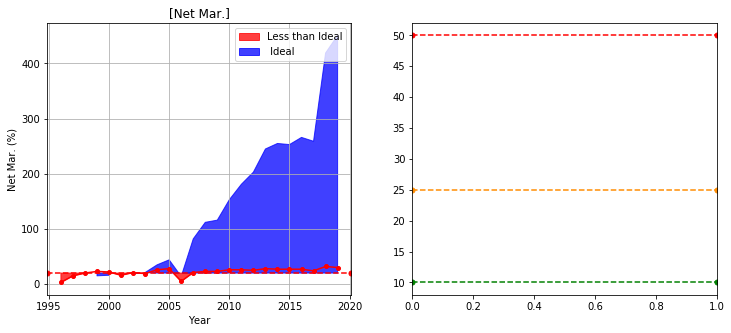

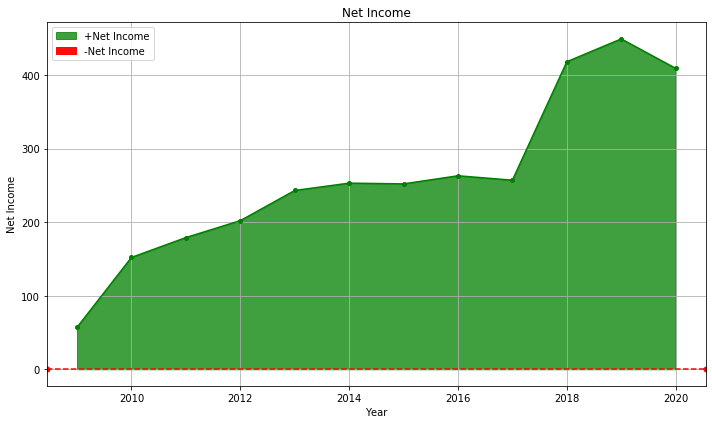

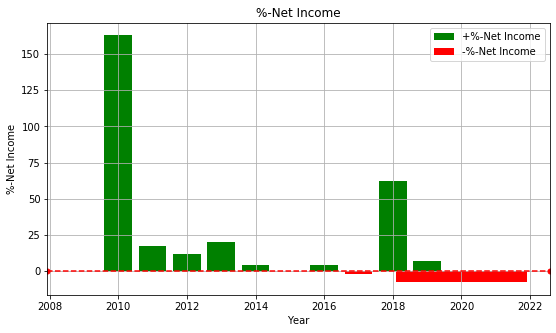

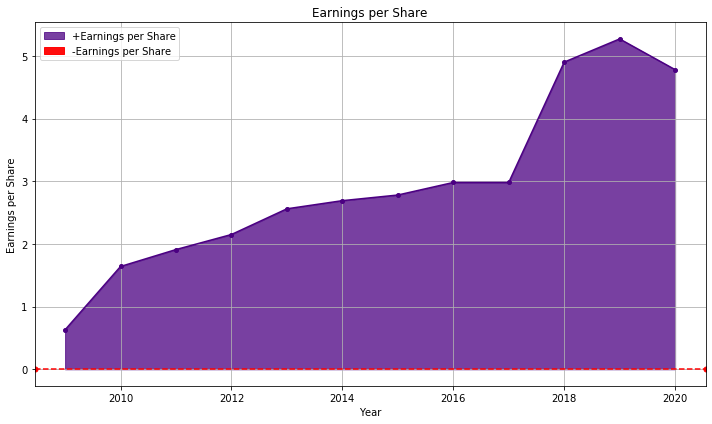

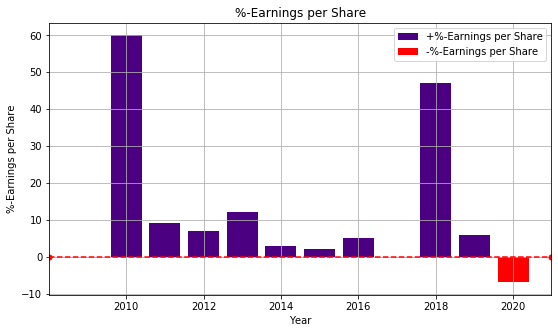

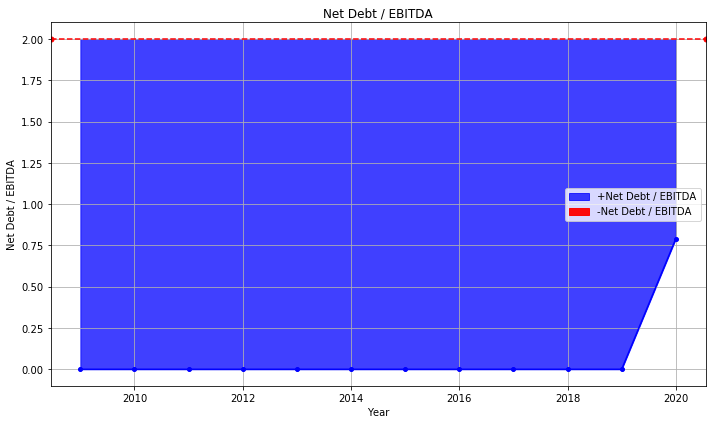

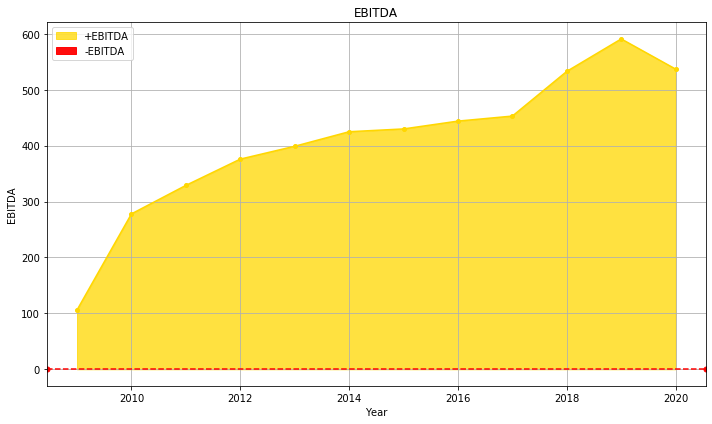

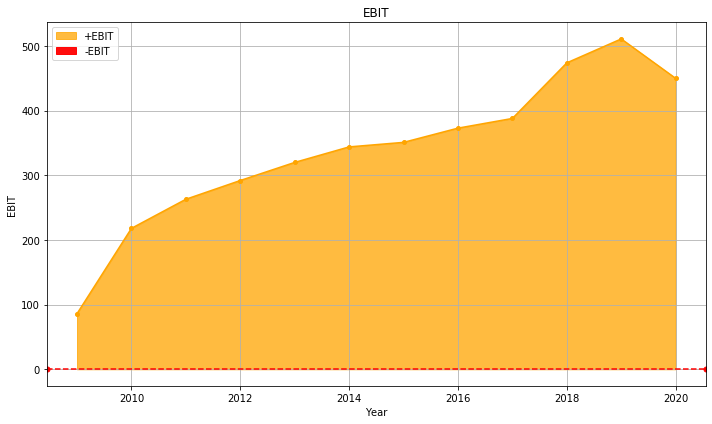

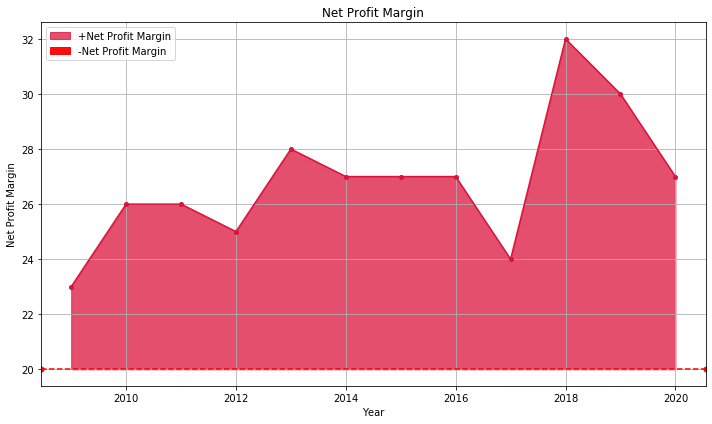

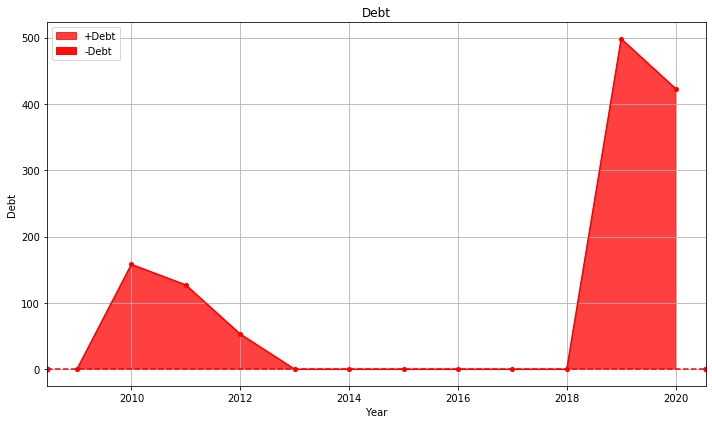

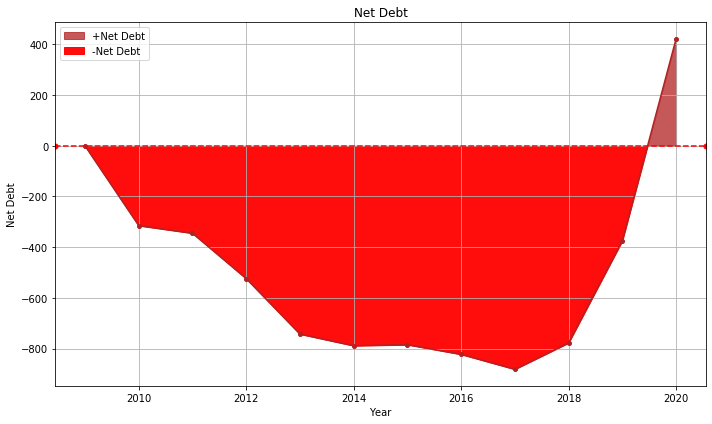

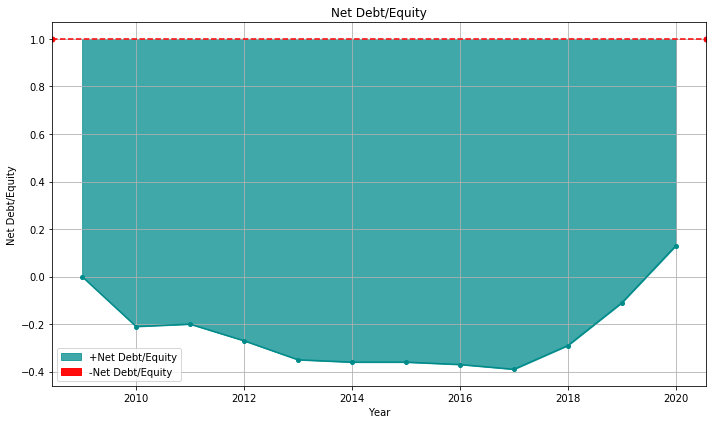

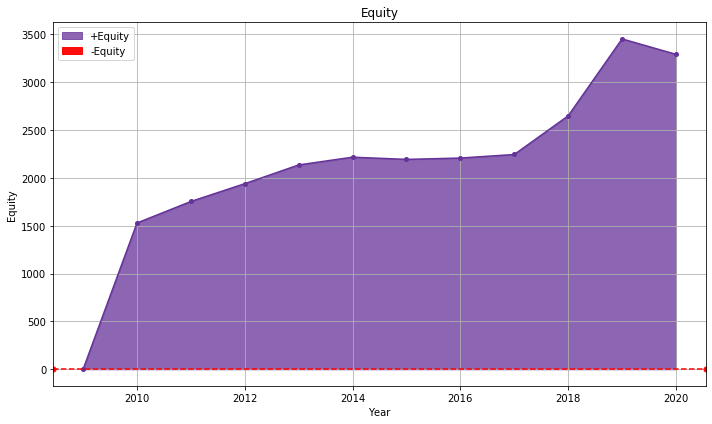

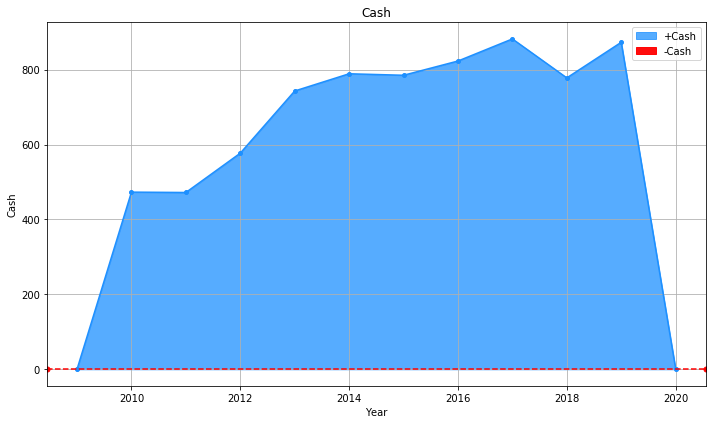

In [11]:
import stock_analisys.stock_full_analisys as fa
fa.complete_study('anss')